# **<p style="font-size: 40px; text-decoration: underline; margin-bottom: 10px;">Mall Customer Behavior Analysis</p>**  
**Name: SAKSHI BADOLA** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **ERP ID: 0251MTCS05** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **Course: M.TECH**  

---

## **Project Objective**  

A leading shopping mall chain wants to understand and predict customer behavior to improve marketing and sales.  

The management wants to answer three questions using Machine Learning:  

1. How does customer income and age affect annual spending? (**Linear Regression**)  
2. Can we predict whether a customer will purchase after visiting the mall? (**Logistic Regression**)  
3. How can we group customers into distinct segments based on their spending patterns? (**K-Means Clustering**)  

**Dataset:** <b>[Mall_Customers.csv](https://www.kaggle.com/code/yousefmohamed20/mall-customer-segmentation-using-kmeans/input) </b> 

| Column | Description |
|--------|------------|
| CustomerID | Unique customer ID |
| Gender | Male/Female |
| Age | Age of the customer |
| Annual Income (k$) | Customer’s annual income in thousands |
| Spending Score (1–100) | Score assigned by the mall based on spending behavior |


<h1 style="font-size: 40px; text-decoration: underline;">Project Tasks</h1>

## **<h4><u>Task 1: Predicting Spending Score using Linear Regression(Supervised Learning)</u></h4>**
<h4>Objective:</h4>
<p>Understand how customer characteristics influence spending.</p>
 <h4>Steps to Predict Customer Spending Score</h4>
  <ol>
    <li>Import the dataset and perform basic EDA (<code>head()</code>, <code>describe()</code>, <code>info()</code>).</li>
    <li>Select features: <strong>Age</strong> and <strong>Annual Income (k$)</strong> as independent variables, and <strong>Spending Score</strong> as the dependent variable.</li>
    <li>Split the data into training and testing sets (80:20).</li>
    <li>Train a Linear Regression model using scikit-learn.</li>
    <li>Evaluate the model using:
      <ul>
        <li>R² Score</li>
        <li>Mean Squared Error (MSE)</li>
        <li>Root Mean Squared Error (RMSE)</li>
      </ul>
    </li>
    <li>Visualize the predicted vs actual Spending Scores.</li>
  </ol>

<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

<h3>Step 1: Import the dataset and perform basic EDA (head(), describe(), info()).</h3>

<h3>1.Import and Load the dataset</h4>

In [2]:
df = pd.read_csv("Mall_Customers.csv")

# Clean column names (replace special dash characters)

df.columns = df.columns.str.replace('–', '-').str.strip()

<h3>2. EDA</h3>

<h4>I. View first few rows [head()]</h4>

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h4>II. Basic info [info()]</h4>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h4>III. Summary Statistics[describe()]</h4>

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h4>IV. Check column names</h4>

In [6]:
df.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<h4>V. Check Missing Values</h4>

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h4>VI. Visualize Column Distributions</h4>

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,5))

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<h4><ul><li>Age Distribution</li></ul></h4>

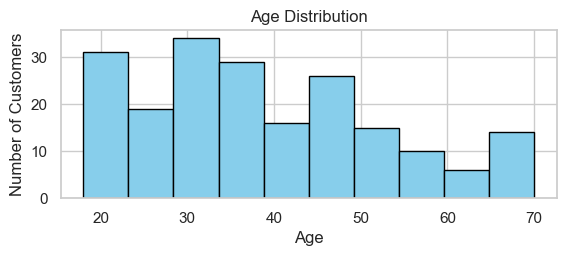

In [9]:
plt.subplot(2,1,1)
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


<h4><ul><li>Annual Income Distribution</li></ul</h4>

Text(0, 0.5, 'Number of Customers')

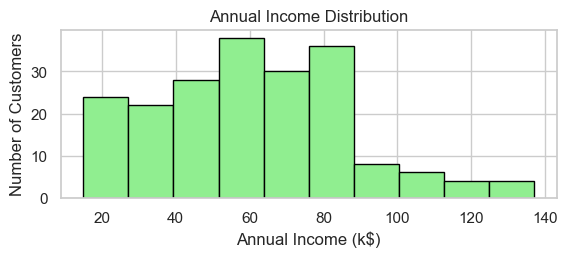

In [10]:
plt.subplot(2,1,1)
plt.hist(df['Annual Income (k$)'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')

<h4><ul><li>Spending Score Distribution</li></ul></h4>

Text(0, 0.5, 'Number of Customers')

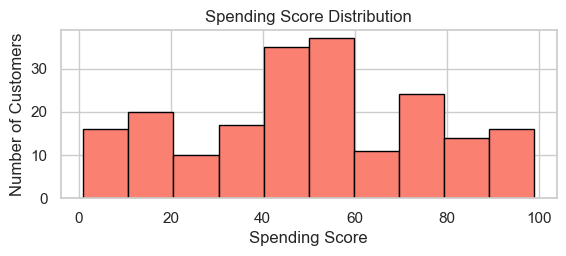

In [11]:
plt.subplot(2,1,1)
plt.hist(df['Spending Score (1-100)'], bins=10, color='salmon', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customers')

---
# <h3>Step 2: Select features: Age and Annual Income (k$) as independent variables, and Spending Score as the dependent variable.</h3>

In [12]:
# Independent variables (features)
X = df[['Age', 'Annual Income (k$)']]

# Dependent variable (target)
y = df['Spending Score (1-100)']

# Check the first few rows
X.head(), y.head()

(   Age  Annual Income (k$)
 0   19                  15
 1   21                  15
 2   20                  16
 3   23                  16
 4   31                  17,
 0    39
 1    81
 2     6
 3    77
 4    40
 Name: Spending Score (1-100), dtype: int64)

<h3>Step 3: Split Data into Training and Testing Sets (80:20)</h3>

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
# Check shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160,)
y_test shape: (40,)


<h3>Step 4: Train a Linear Regression Model</h3>

<h4>&emsp;&emsp;1. Create Linear Regression model</h4>

In [14]:
model = LinearRegression()

<h4>&emsp;&emsp;2. Train the model on training data</h4>

In [15]:
model.fit(X_train, y_train)

LinearRegression()

<h4>&emsp;&emsp;3. Make predictions on test data</h4>

In [16]:
y_pred = model.predict(X_test)

<h4>&emsp;&emsp;4. Display coefficients and intercept</h4>

In [17]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 71.53258395331329
Coefficients: [-0.58929193  0.05235827]


<h3>Step 5: Evaluate the Model</h3>

In [18]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.019631778132180422


<h4>&emsp;&emsp;I. R² Score</h4>


### 🔹 What it measures

R² tells you **how much of the variation in the target variable (Y)** is explained by the model (the independent variables, X).

* It’s a number between **0 and 1** (though it can be negative for poor models).
* **Closer to 1** → better fit
* **Closer to 0** → worse fit

---

### 🔹 Formula

[
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
]

Where:

* ( SS_{res} ) = Sum of squared residuals (errors between predicted and actual values)
* ( SS_{tot} ) = Total sum of squares (variation in the actual data)

---

### 🔹 Intuitive example

Suppose you’re predicting house prices:

* If **R² = 0.9**, it means **90% of the variation** in house prices is explained by your model.
* If **R² = 0.3**, only **30% of the variation** is explained — your model doesn’t capture much of what’s happening.

---

### 🔹 When to use it

* Used mainly in **regression problems** (linear or multiple regression).
* Helps compare different models — higher R² usually means a better fit (though not always).

---

### ⚠️ Important notes

* A **high R²** doesn’t always mean the model is good — it might just be **overfitting**.
* For **nonlinear models** or models that don’t have a linear relationship, R² may not be a reliable measure.

---

<h4>&emsp;&emsp;II. Mean Squared Error (MSE)</h4>

**Mean Squared Error (MSE)** is another key metric used to evaluate **regression models** — it measures how far the model’s predictions are from the actual values.

---

### 🔹 What it measures

MSE tells you the **average of the squared differences** between predicted and actual values.

In short:

> It shows **how wrong** your predictions are, on average.

---

### 🔹 Formula

[
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
]

Where:

* ( y_i ) = actual (true) value
* ( \hat{y_i} ) = predicted value
* ( n ) = number of data points

---

### 🔹 Interpretation

* **Lower MSE = better model performance**
* MSE is always **non-negative** (since the errors are squared).
* A perfect model would have **MSE = 0**.

Because it squares the errors, **large mistakes are penalized more heavily** — so MSE is sensitive to outliers.

---

### 🔹 Example

If you’re predicting house prices:

| Actual | Predicted |
| ------ | --------- |
| 100    | 110       |
| 200    | 195       |
| 300    | 290       |

MSE = [
\frac{(100-110)^2 + (200-195)^2 + (300-290)^2}{3}
= \frac{(100 + 25 + 100)}{3}
= 75
]

So, the model’s **average squared error** is 75.

---

### 🔹 In Python

```python
from sklearn.metrics import mean_squared_error

y_true = [100, 200, 300]
y_pred = [110, 195, 290]

mse = mean_squared_error(y_true, y_pred)
print(mse)  # 75.0
```

---

### 🔹 When to use MSE

* For **regression tasks** to measure prediction accuracy.
* Good for comparing models — lower MSE usually means better predictions.

If you want a more interpretable metric in the same units as your target variable, you can take the **square root of MSE** — that’s called **RMSE (Root Mean Squared Error)**.

---


In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 483.5568217540833


<h4>&emsp;&emsp;III. Root Mean Squared Error (RMSE)</h4>

**Root Mean Squared Error (RMSE)** is a very common metric used to evaluate **regression models** — it’s basically the **square root of the Mean Squared Error (MSE)**.

It tells you, on average, **how much the predictions deviate from the actual values**, in the same units as the target variable.

---

### 🔹 Formula

[
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
]

Where:

* ( y_i ) = actual value
* ( \hat{y_i} ) = predicted value
* ( n ) = number of observations

---

### 🔹 Why we take the square root

MSE gives squared errors (like "square rupees" or "square meters"), which are hard to interpret.
By taking the square root, **RMSE brings the error back to the same units** as your output variable.

So if you’re predicting house prices in ₹, RMSE will also be in ₹ — making it easier to understand.

---

### 🔹 Interpretation

* **Lower RMSE = better model**
* RMSE = 0 means a perfect model (predictions exactly match actual values)
* It’s **sensitive to outliers**, because large errors are squared before averaging.

---

### 🔹 Example

If the actual vs predicted prices are:

| Actual | Predicted |
| ------ | --------- |
| 100    | 110       |
| 200    | 195       |
| 300    | 290       |

Then:
[
RMSE = \sqrt{75} = 8.66
]

That means your predictions are, on average, about **8.66 units off**.

---

### 🔹 In Python

```python
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = [100, 200, 300]
y_pred = [110, 195, 290]

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(rmse)  # 8.66
```

---

### 🔹 When to use RMSE

* When you want a **clear, interpretable measure** of prediction accuracy.
* Especially useful when **large errors are more serious** than small ones (since it penalizes them more).

---


In [20]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 21.98992546040307


<h3>Step 6: Visualize Predicted vs Actual Spending Scores</h3>

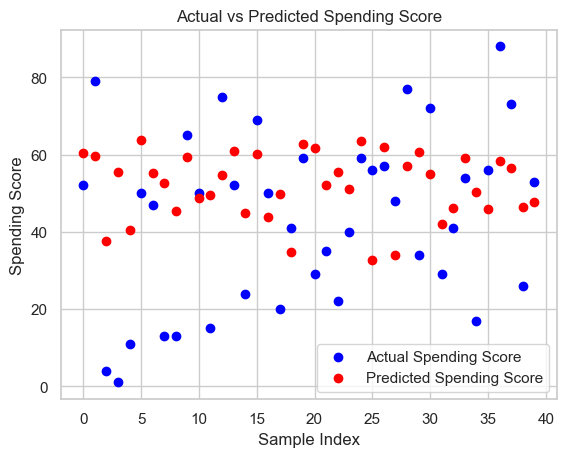

In [21]:
# Plot actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Spending Score')

# Plot predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Spending Score')

plt.title('Actual vs Predicted Spending Score')
plt.xlabel('Sample Index')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

<h2>&emsp;Questions to Answer:</h2>
<h4>&emsp;&emsp;Q1. What is the regression equation obtained from the model?</h4>
<h5>&emsp;&emsp;&emsp;ANS:</h5>

In [22]:

# Extract intercept and coefficients
intercept = model.intercept_
coeff_age, coeff_income = model.coef_

# Display model parameters neatly
print("\n" + "-"*70)
print(" LINEAR REGRESSION MODEL PARAMETERS ".center(60))
print("-"*70)

print(f"Intercept: {intercept:.2f}")
print(f"Coefficient for Age: {coeff_age:.2f}")
print(f"Coefficient for Annual Income (k$): {coeff_income:.2f}")

print("\n" + "-"*70)
print(" REGRESSION EQUATION ".center(70))
print("-"*70)

# Print regression equation neatly
print(f"Spending Score = {intercept:.2f} + ({coeff_age:.2f} * Age) + ({coeff_income:.2f} * Annual Income (k$))")
print("-"*70)



----------------------------------------------------------------------
             LINEAR REGRESSION MODEL PARAMETERS             
----------------------------------------------------------------------
Intercept: 71.53
Coefficient for Age: -0.59
Coefficient for Annual Income (k$): 0.05

----------------------------------------------------------------------
                         REGRESSION EQUATION                          
----------------------------------------------------------------------
Spending Score = 71.53 + (-0.59 * Age) + (0.05 * Annual Income (k$))
----------------------------------------------------------------------


<h4>&emsp;&emsp;Q2. Which factor (Age or Income) has a stronger impact on Spending Score?</h4>
<h5>&emsp;&emsp;&emsp;ANS:</h5>

In [23]:
# Compare absolute values of coefficients
impact_age = abs(coeff_age)
impact_income = abs(coeff_income)

if impact_age > impact_income:
    stronger_factor = "Age"
else:
    stronger_factor = "Annual Income"

print("\n" + "-"*60)
print(" STRONGER IMPACT FACTOR ".center(60))
print("-"*60)
print(f"Coefficient for Age: {coeff_age:.2f}")
print(f"Coefficient for Annual Income (k$): {coeff_income:.2f}")
print(f"\nConclusion: {stronger_factor} has a stronger impact on Spending Score.")
print("-"*60)



------------------------------------------------------------
                   STRONGER IMPACT FACTOR                   
------------------------------------------------------------
Coefficient for Age: -0.59
Coefficient for Annual Income (k$): 0.05

Conclusion: Age has a stronger impact on Spending Score.
------------------------------------------------------------


<h4>&emsp;&emsp;Q3. What business insights can mall management derive from this relationship?</h4>
<h5>&emsp;&emsp;&emsp;ANS:</h5>

In [24]:
# Extract coefficients
coefficients = {
    'Age': coeff_age,
    'Annual Income (k$)': coeff_income
}

print("\n" + "-"*60)
print(" BUSINESS INSIGHTS (Derived from Model Coefficients) ".center(60))
print("-"*60)

for feature, coef in coefficients.items():
    if coef > 0:
        print(f"{feature}: Positive coefficient → higher {feature.lower()} increases spending.")
    elif coef < 0:
        print(f"{feature}: Negative coefficient → higher {feature.lower()} decreases spending.")
    else:
        print(f"{feature}: No effect on spending.")

# Example strategies automatically based on coefficient sign
if coefficients['Age'] < 0:
    print("\nMarketing Strategy: Focus on younger customers who tend to spend more.")
if coefficients['Annual Income (k$)'] > 0:
    print("Marketing Strategy: Higher income slightly increases spending, consider targeting mid-high income customers.")
else:
    print("Marketing Strategy: Income is less significant; campaigns can target all income groups.")

print("-"*60)




------------------------------------------------------------
    BUSINESS INSIGHTS (Derived from Model Coefficients)     
------------------------------------------------------------
Age: Negative coefficient → higher age decreases spending.
Annual Income (k$): Positive coefficient → higher annual income (k$) increases spending.

Marketing Strategy: Focus on younger customers who tend to spend more.
Marketing Strategy: Higher income slightly increases spending, consider targeting mid-high income customers.
------------------------------------------------------------


---

### <h1 style="font-size: 30px; text-decoration: underline;">Task 2: Purchase Prediction using Logistic Regression (Supervised Learning)</h1>

<h4><u>Objective:</u></h4>
<ul>
    <li>Predict whether a customer is a Potential Buyer (1) or Non-Buyer (0).</li>
    <li>For this, create a new binary variable based on Spending Score — for example, customers with Spending Score ≥ 60 can be labelled as 
        <strong>1: Likely Buyer</strong>, otherwise <strong>0: Not Likely</strong>.
    </li>
</ul>
<h3>Steps:</h3>

<ol>
  <li><strong>Create a new column: </strong>
    <code>df['Purchased'] = df['Spending Score (1-100)'].apply(lambda x: 1 if x >= 60 else 0)</code>
  </li>

  <li><strong>Select features: </strong>
    Use <code>Age</code>, <code>Annual Income (k$)</code>, and <code>Gender</code> (after encoding).
  </li>

  <li><strong>Split the data: </strong>
    Divide the dataset into training and testing sets using a 70:30 ratio.
  </li>

  <li><strong>Apply Logistic Regression: </strong>
    Train the model on the training set and make predictions on the test set.
  </li>

  <li><strong>Evaluate the model: </strong>
    <ul>
      <li>Confusion Matrix</li>
      <li>Accuracy, Precision, Recall, F1-score</li>
      <li>ROC Curve and AUC Score</li>
    </ul>
  </li>

  <li><strong>Interpret the model output: </strong>
    Analyze the evaluation metrics to understand model performance and identify areas for improvement.
  </li>
</ol>
<h4>Step 1: Create a new column</h4>


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [26]:
# Create Purchased column: 1 if Spending Score >= 60, else 0
df['Purchased'] = df['Spending Score (1-100)'].apply(lambda x: 1 if x >= 60 else 0)

# Encode Gender: Male = 1, Female = 0
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Show first 5 rows
df[['Age', 'Annual Income (k$)', 'Gender', 'Purchased']].head()


,Age,Annual Income (k$),Gender,Purchased
0,19,15,1,0
1,21,15,1,1
2,20,16,0,0
3,23,16,0,1
4,31,17,0,0


<h3>Step 2: Select Features and Split Data</h3>

In [27]:
X = df[['Age', 'Annual Income (k$)', 'Gender']]
y = df['Purchased']

# Split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3>Step 3: Train Logistic Regression Model</h3>

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

<h3>Step 4: Evaluate Model</h3>

In [29]:
# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

# Metrics
print("\n" + "-"*60)
print(" LOGISTIC REGRESSION MODEL EVALUATION ".center(60))
print("-"*60)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {auc:.2f}")

# Feature Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
print("\nFeature Coefficients:")
print(coefficients)
print("-"*60)


------------------------------------------------------------
            LOGISTIC REGRESSION MODEL EVALUATION            
------------------------------------------------------------
Confusion Matrix:
[[35 10]
 [ 8  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        45
           1       0.41      0.47      0.44        15

    accuracy                           0.70        60
   macro avg       0.61      0.62      0.62        60
weighted avg       0.71      0.70      0.71        60

ROC AUC Score: 0.77

Feature Coefficients:
              Feature  Coefficient
0                 Age    -0.083319
1  Annual Income (k$)     0.008547
2              Gender     0.145970
------------------------------------------------------------


<h4>Q4. What does the logistic regression output (probability) represent?</h4>

In [30]:
# Predicted probabilities for test set
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of being a buyer

# Show first 10 probabilities
print(y_prob[:10])


[0.61992295 0.5778588  0.05915202 0.45261043 0.08843177 0.69052625
 0.39511464 0.35134708 0.14799973 0.54085112]


<p style="font-size: 18px;">
<ul>
  <li>Each value in <code>y_prob</code> is a probability that the customer will purchase.</li>
  <li>Example: 0.82 → customer has 82% chance of buying, 0.15 → 15% chance.</li>
  <li>This helps prioritize customers for marketing campaigns.</li>
</ul>
</p>
<br>
<h3>Q5. Which variable has the strongest influence on purchase decision?</h3>

In [31]:
# Check coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
print(coefficients)


              Feature  Coefficient
0                 Age    -0.083319
1  Annual Income (k$)     0.008547
2              Gender     0.145970


<ul  style="font-size: 18px;">
    <li>Gender has the largest coefficient (0.146) → strongest influence on purchase likelihood.</li>
    <li>Age has a small negative impact, Income is almost negligible.</li>
</ul>
<br>
<h3>Q6. What can management do to target high-probability buyers?</h3>

In [32]:
# Identify high-probability buyers (prob > 0.7)
high_prob_buyers = X_test[y_prob > 0.7]
print(high_prob_buyers.head())


     Age  Annual Income (k$)  Gender
65    18                  48       1
114   18                  65       0


<ul style="font-size: 18px;">
  <li>Target customers with predicted probability &gt; 70%.</li>
  <li>Marketing actions:
    <ul>
      <li>Personalized offers or discounts.</li>
      <li>Loyalty programs for high-probability buyers.</li>
      <li>Special campaigns based on Gender (since it has strongest effect).</li>
    </ul>
  </li>
</ul>
<br><br>

---

## **<h4 style="font-size: 30px; text-decoration: underline;">Task 3: Customer Segmentation using K-Means Clustering (Unsupervised Learning)</h4>**  

<p style="font-size: 18px;"><b>Objective:</b> Group customers into distinct clusters for marketing strategies.</p>
<p style="font-size: 18px;"><b>Steps:</b></p>
<ol style="font-size: 18px;">
  <li>Select features: <i>Annual Income (k$)</i> and <i>Spending Score (1–100)</i>.</li>
  <li>Apply <b>K-Means Clustering</b> with <code>k</code> ranging from 2 to 10.</li>
  <li>Use the <b>Elbow Method</b> to find the optimal number of clusters.</li>
  <li>Visualize clusters in a 2D plot.</li>
  <li>Interpret each cluster’s characteristics.</li>
</ol>

In [33]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.cluster import KMeans

<h3>Step 1: Select features</h3>

In [34]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

<h3>Step 2: Determine optimal number of clusters (Elbow Method)</h3>

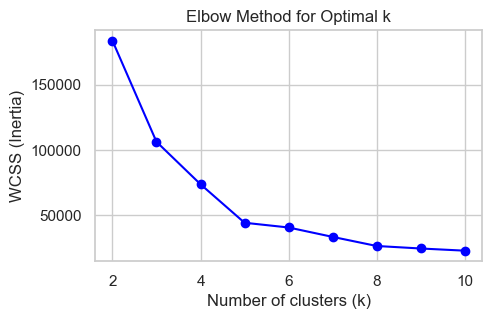

In [35]:
# Calculate WCSS (Within-Cluster Sum of Squares) for k=2 to 10
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(5,3))
plt.plot(range(2, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

<h3>Step 3: Apply K-Means Clustering</h3>

In [36]:
optimal_k = 5  # from elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

<h3>Step 4: Visualize clusters</h3>

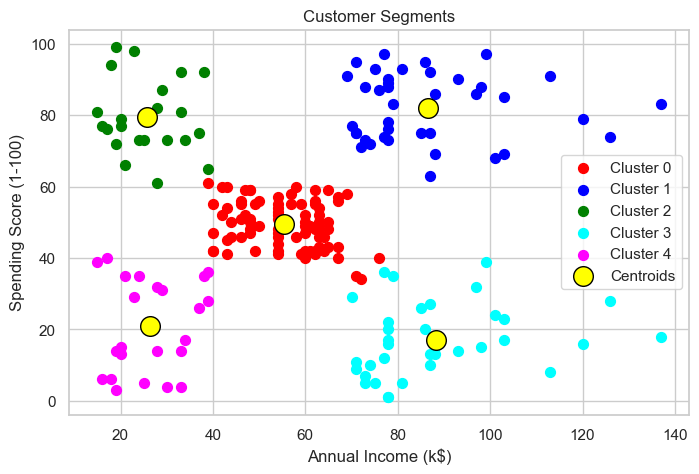

In [37]:
plt.figure(figsize=(8,5))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for c in range(optimal_k):
    plt.scatter(X[df['Cluster'] == c]['Annual Income (k$)'],
                X[df['Cluster'] == c]['Spending Score (1-100)'],
                s=50, color=colors[c], label=f'Cluster {c}')

# Cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, color='yellow', label='Centroids', edgecolor='black')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()


<h3>Step 5: Interpret cluster characteristics</h3>

In [38]:
# Mean income and spending score per cluster
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary,"\n")
print("\n" + "-"*60)

# Count of customers per cluster
print(df['Cluster'].value_counts())


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043 


------------------------------------------------------------
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


<h3>Q7. How many optimal clusters were identified?</h3>


In [39]:
print("Optimal number of clusters:", optimal_k)

Optimal number of clusters: 5


<h3>Q8. Describe the key characteristics of each cluster (e.g., high income–low spenders, low income–high spenders).</h3>

In [40]:
# Summary of cluster characteristics
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

# Round numeric columns to 2 decimals
cluster_summary['Annual Income (k$)'] = cluster_summary['Annual Income (k$)'].round(2)
cluster_summary['Spending Score (1-100)'] = cluster_summary['Spending Score (1-100)'].round(2)

# Add segment descriptions
def describe_segment(row):
    if row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] > 70:
        return "High Income, High Spenders"
    elif row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] <= 50:
        return "High Income, Low Spenders"
    elif row['Annual Income (k$)'] <= 40 and row['Spending Score (1-100)'] > 70:
        return "Low Income, High Spenders"
    elif row['Annual Income (k$)'] <= 40 and row['Spending Score (1-100)'] <= 50:
        return "Low Income, Low Spenders"
    else:
        return "Mid Income, Average Spenders"

cluster_summary['Segment Description'] = cluster_summary.apply(describe_segment, axis=1)

# Print table
cluster_summary


,Cluster,Annual Income (k$),Spending Score (1-100),Segment Description
0,0,55.30,49.52,"Mid Income, Average Spenders"
1,1,86.54,82.13,"High Income, High Spenders"
2,2,25.73,79.36,"Low Income, High Spenders"
3,3,88.20,17.11,"High Income, Low Spenders"
4,4,26.30,20.91,"Low Income, Low Spenders"


<ul>
    <li>
      <b>Cluster 1→ </b> Wealthy and spend a lot → <em>Premium segment</em>
    </li>
    <li>
      <b>Cluster 2 →</b> Low income but spend a lot → <em>Budget-conscious high spenders</em>
    </li>
    <li>
      <b>Cluster 3 →</b> Wealthy but spend little → <em>Selective/luxury shoppers</em>
    </li>
    <li>
      <b>Cluster 4 →</b> Low income and low spending → <em>Low-engagement segment</em>
    </li>
    <li>
      <b>Cluster 0 →</b> Middle-income, average spenders → <em>Typical customers</em>
    </li>
  </ul>

<h3>Q9. Suggested marketing or engagement strategies for each cluster</h3>
<p style="font-size: 16px;"> <b>Ans: </b>
    <ul>
    <li><b>Cluster 0</b> : General campaigns, loyalty rewards, seasonal offers.</li>
    <li><b>Cluster 1</b> : Premium offers, VIP memberships, exclusive access.</li>
    <li><b>Cluster 2</b> : Bundle deals, loyalty points, budget-friendly promotions.</li>
    <li><b>Cluster 3</b> : Personalized ads, luxury products, in-store events.</li>
    <li><b>Cluster 4</b> : Basic offers, low-cost promotions to attract visits.</li>
    <ul>
</p>

### <h1><u>4. Integrated Reflection and Analysis</u></h1>
### Q10. Compare the supervised and unsupervised approaches used in this project
<b>Ans: </b>
**Supervised Learning:**  
- Uses labeled data (target variable known).  
- Examples: Linear Regression (Spending Score), Logistic Regression (Purchase Prediction).  
- Purpose: Make predictions based on input features.  

**Unsupervised Learning:**  
- Uses unlabeled data (no target variable).  
- Example: K-Means Clustering (Customer Segmentation).  
- Purpose: Discover hidden patterns or groups.  

**Summary:**  
Supervised = Prediction | Unsupervised = Pattern Discovery

---

### Q11. How does regression differ in prediction and classification tasks?
<b>Ans: </b>
- **Regression:** Predicts a continuous value (e.g., Spending Score).  
- **Classification:** Predicts a category (e.g., Likely Buyer = 1, Not Likely = 0).  

**Key Difference:** Regression → numbers, Classification → categories

---

### Q12. Which model do you find most practically useful for the business and why?
<b>Ans: </b>
**Most useful model:** K-Means Clustering  

**Reason:**  
- Identifies distinct customer segments.  
- Enables targeted marketing campaigns.  
- Helps improve sales and customer loyalty.

---

### Q13. How can these insights help in improving sales or customer retention?
<b>Ans: </b>
- Personalize offers for each customer segment.  
- Target high-probability buyers with promotions.  
- Reward loyal or high-spending customers.  
- Encourage low-spending segments with budget-friendly campaigns.  

---

### Q14. Suggest one advanced algorithm (e.g., Decision Tree, Random Forest, PCA) that could extend this study?
<b>Ans: </b>
- **Random Forest:** Better accuracy for predicting spending or purchase likelihood. Handles complex feature interactions.  
- **PCA (Principal Component Analysis):** Reduces dimensionality, simplifies visualization of customer clusters.  

